In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate
from scipy.integrate import solve_ivp

In [2]:
plt.rc('text', usetex = True)
plt.rc('font', **{'family' : "sans-serif"})
params = {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

# Esferas autogravitantes Polítropas - Máster

# Condiciones de aceptabilidad

### Ecuaciones de estructura: 
$\frac{\mathcal{d}P}{\mathcal{d}r} = - \frac{(\rho + P)(m + 4 \pi P r^3)}{r(r-2m)} + \frac{2 \Delta}{r}$ ; $\Delta = P_{\perp} - P$

$\frac{\mathcal{d}m}{\mathcal{d}r} = 4 \pi r^{2} \rho $

### Ecuaciones de estado:
$P = \kappa \rho^{1 + 1/n} + \alpha \rho - \beta$

$\Delta = C (\nu^{\prime})r (\rho + P_r)$ , siendo $\nu^{\prime}  = \frac{m + 4 \pi P_r r^3}{r(r-2m)}$ ; $ C = cte $

Reemplazando la segunda ecuación de estado ($\Delta$) en la primera ecuación de estructura, se tiene:

$\frac{\mathcal{d}P}{\mathcal{d}r} = - h \frac{(\rho + P)(m + 4 \pi P r^3)}{r(r-2m)}$ ; $h = 1 - 2C$

###  Lane-Emden

#### *Cambio de variables

$ \Psi^{n}(\xi) = \frac{\rho}{\rho_c} \ , \ \ \eta (\xi) = \frac{m}{4 \pi \rho_c a^{3}} \ , \ \ \sigma = \frac{P_c}{\rho_c} \ , \ \ r = a \xi \ , \ \ a^{2} = \frac{\Upsilon (n + 1)}{4 \pi \rho_c} \ , \ \ \Upsilon = \kappa \rho_c^{1/n} = \frac{\sigma - \alpha \left(1 - \varkappa \right)}{1 - \varkappa^{1 + 1/n}} \ , \ \ \varkappa = \frac{\rho_b}{\rho_c}.$

#### Ecuaciones de estructura:

$ \frac{\xi^{2} \Omega \left[1 + \frac{b}{\Upsilon \Psi} \right]}{1 + \frac{\hat{P}}{\Psi^{n}}} \frac{\mathcal{d}\Psi}{\mathcal{d}\xi} + h \left(\eta + \xi^{3} \hat{P} \right) = 0 $ $\quad$ ; $\quad$ $ \Omega = 1 - \frac{2 \Upsilon \left(n+1 \right) \eta }{\xi} \ , \ b = \frac{\alpha n}{n + 1} \ , \ \hat{P} = \frac{P}{\rho_{c}} = \Upsilon \left(\Psi^{n+1} - \varkappa^{1 + 1/n} \right) + \alpha \left(\Psi^{n} - \varkappa \right) $

$ \frac{\mathcal{d}\eta}{\mathcal{d}\xi} = \xi^{2} \Psi^{n}  $


#### Ecuaciones de Estado

$ P = \kappa \rho_c^{1 + 1/n} \Psi^{n+1} + \alpha \rho_c \Psi^{n} - \beta = \rho_c \left[ \Upsilon \left( \Psi^{n+1} - \varkappa^{1 + 1/n} \right) + \alpha \left(\Psi^{n} - \varkappa \right) \right]  $

$ \Delta = \frac{C \Upsilon (n+1) (\eta + \xi^{3} \hat{P})}{\xi \Omega} \left( \Psi^{n} + \hat{P} \right) \rho_{c} $

El sistema de ecuaciones a integrar es:

* $\frac{\mathrm{d}\Psi}{\mathrm{d}\xi} = - \frac{h \left(\eta + \xi^{3} \hat{P} \right) \left(1 + \frac{\hat{P}}{\Psi^{n}} \right)}{\xi^{2} \Omega \left(1 + \frac{b}{\Upsilon \Psi} \right)}  $

* $\frac{\mathrm{d}\eta}{\mathrm{d}\xi} = \xi^{2}\Psi^{n}$

* $\frac{\mathrm{d}^{2}\Psi}{\mathrm{d}\xi^{2}} = - \frac{h}{\xi^{2} \Omega \left(1 + \frac{b}{\Upsilon \Psi} \right)} \left\{ \left(\dot{\eta} + 3 \xi^{2} \hat{P} + \xi^{3}\dot{\hat{P}} \right) \left(1 + \frac{\hat{P}}{\Psi^{n}} \right) + \left(\eta + \xi^{3} \hat{P} \right) \left( \frac{\dot{\hat{P}}}{\Psi^{n}} - \frac{n \hat{P} \dot{\Psi}}{\Psi^{n+1}} \right) + \left(\eta + \xi^{3} \hat{P} \right)\left(1 + \frac{\hat{P}}{\Psi^{n}} \right) \left[ \frac{2 \Upsilon \left(n+1 \right) \dot{\eta} - 1}{\xi \Omega} + \frac{b \dot{\Psi}}{\Upsilon \Psi^{2} \left(1 + \frac{b}{\Upsilon \Psi} \right)} - \frac{1}{\xi} \right] \right\}  $

* $\frac{\mathrm{d}^{2}\eta}{\mathrm{d}\xi^{2}} = 2 \xi \Psi^{n} + \xi^{2} n \Psi^{n-1} \Psi^{\prime} $

donde $ \ \ \dot{\hat{P}} = \frac{\mathrm{d}\hat{P}}{\mathrm{d}\xi} = \left(n + 1 \right) \Upsilon \Psi^{n} \left(1 + \frac{b}{\Upsilon \Psi} \right) \dot{\Psi} $.


Con condiciones iniciales y de frontera:

$ \Psi (\xi = 0) = \Psi_{c} = 1 \quad , \quad \eta (\xi = 0) = \eta_{c} = 0  $

$ \frac{\mathcal{d}\Psi}{\mathcal{d}\xi} \big\rvert_{\xi = 0} = \dot{\Psi_{c}} = - \frac{h \left(\eta_{c} + \xi^{3}_{c} \hat{P_{c}} \right) \left(1 + \frac{\hat{P_{c}}}{\Psi_{c}^{n}} \right)}{\xi_{c}^{2} \Omega_{c} \left(1 + \frac{b}{\Upsilon \Psi_{c}} \right)} \approx 0 \quad , \quad \frac{\mathcal{d}\eta}{\mathcal{d}\xi} \big\rvert_{\xi = 0} = \dot{\eta_{c}} = \xi^{2}_{c} \Psi^{n}_{c} \approx 0 $

$ \psi (\xi = \xi_{1}) = 0 \, $, siendo $\xi_{1}$ el borde de la configuración

Además, $ \tilde{\xi} = \frac{\xi}{\xi_{1}}  $

In [3]:
# Definiendo sistema de ecuaciones
def funciones(xi,y, alpha, n, h, Upsilon, varkappa):
    psi_ , eta_, psi1_, eta1_ = y
    dydxi = [-h*(eta_+ xi**(3)*(Upsilon*(psi_**(n+1) - varkappa**(1 + 1/n)) + alpha*(psi_**(n) - varkappa)))*(1 + Upsilon*(psi_ - (varkappa**(1 + 1/n)/psi_**(n))) + alpha*(1 - (varkappa/psi_**(n))))/xi/(xi - 2*Upsilon*(n+1)*eta_) /(1 + alpha*n/Upsilon/(n+1)/psi_) 
            ,xi**(2) * psi_**(n)
            ,-(h/xi/(xi - 2*Upsilon*(n+1)*eta_)/(1 + alpha*n/Upsilon/(n+1)/psi_))*((eta1_ + 3*xi**(2)*(Upsilon*(psi_**(n+1) - varkappa**(1 + 1/n)) + alpha*(psi_**(n) - varkappa)) + xi**(3)*(n+1)*Upsilon*psi_**(n)*psi1_*(1 + alpha*n/Upsilon/(n+1)/psi_))*(1 + Upsilon*(psi_ - varkappa**(1 + 1/n)/psi_**(n)) + alpha*(1 - varkappa/psi_**(n))) + (eta_ + xi**(3)*(Upsilon*(psi_**(n+1) - varkappa**(1+ 1/n)) + alpha*(psi_**(n) - varkappa)))*((n+1)*Upsilon*psi1_*(1 + alpha*n/Upsilon/(n+1)/psi_) - n*(Upsilon*(psi_**(n+1) - varkappa**(1 + 1/n)) + alpha*(psi_**(n) - varkappa))*psi1_/psi_**(n+1)) + (eta_ + xi**(3)*(Upsilon*(psi_**(n+1) - varkappa**(1 + 1/n)) + alpha*(psi_**(n) - varkappa)))*(1 + Upsilon*(psi_ - varkappa**(1 + 1/n)/psi_**(n)) + alpha*(1 - varkappa/psi_**(n)))*((2*Upsilon*(n+1)*eta1_ - 1)/(xi - 2*Upsilon*(n+1)*eta_) + alpha*n*psi1_/(1 + alpha*n/Upsilon/(n+1)/psi_)/Upsilon/(n+1)/psi_**(2) - 1/xi))
            ,2*xi*psi_**(n) + n*xi**(2)*psi_**(n-1)*psi1_] 
    return dydxi

In [4]:
c = 2.997*10**(8)          # Velocidad de la luz en S.I.
G = 6.673*10**(-11)        # Constante de gravitación universal en S.I.
Msun = 1.989*10**(30)      # Masa solar en S.I.

* $Modelo\ Genérico: M = 1.5 \, M_{\odot}, \, R = 10.0 \, km$

    $C = 0.05 ; \, n = 0.8 ; \,  \rho_c = 1.5\times10^{18} \, kg/m^{3} ; \, \alpha = -0.01 ; \, \varkappa = 0.2 ; \, \sigma = 0.2$

In [5]:
C = 0.05  # Valor de C para anisotropía

h = 1 - 2*C

sigma = 0.2 

rho_c = 1.5*10**(18)

alpha = -0.01 # Constante del término lineal

varkappa = 0.2 # Razón entre densidad en el borde y densidad central

Lista_n = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]        # Lista de índices polítropos n
print('Valores de n: ',end='')                                                    
print(*Lista_n, sep=', ')

Valores de n: 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0


In [6]:
ListaModelos = []

In [7]:
%%time

for i in range(len(Lista_n)):
    
    n = Lista_n[i]
    
    Upsilon = (sigma - alpha*(1 - varkappa))/(1 - varkappa**(1 + 1/n))
        
    # Condiciones iniciales
    Psi0 = 1.0
    Eta0 = 0.0
    Psi10 = 0.0
    Eta10 = 0.0
    
    y0 = [Psi0,Eta0,Psi10,Eta10]
    
    def stop_condition(xi,y,alpha, n, h, Upsilon, varkappa):
        return (1/sigma)*(Upsilon*(y[0]**(n+1) - varkappa**(1 + 1/n)) + alpha*(y[0]**(n) - varkappa)) - 10**-15
    
    stop_condition.terminal = True
    
    xi0 = 10**(-15)
    ximax = 1000
    
    xi_span = (xi0,ximax)
   
    
    soluciones = solve_ivp(funciones,xi_span,y0,method='RK45',events=stop_condition,
                           args=(alpha, n, h, Upsilon, varkappa),max_step=1/50)
    
    Psi = soluciones.y[0]
    Eta = soluciones.y[1]
    Psi1 = soluciones.y[2]
    Eta1 = soluciones.y[3]
    xi = soluciones.t  
        
    #########################################################################################################################
   

    # Xi normalizada
    xiNorm = xi/xi[-1]
    
    mr = 2*Upsilon*(n+1)*Eta/xi                                           # 2*G*m/c**(2)/r
    
    Densidad = Psi**(n)
    
    varP = Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)
    
    # Presión entre presión central
    PNorm = (1/sigma)*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa))
    
    # Presión tangencial
    PTNorm = C*Upsilon*(n+1)*(Eta + xi**(3)*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)))*(Psi**(n) + (Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)))/sigma/(xi - 2*Upsilon*(n+1)*Eta) + (Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa))/sigma
    
    # Gradiente de densidad
    Dprima = n*Psi**(n-1)*Psi1   
    
    # Gradiente de presión radial
    Pprima = (1/sigma)*Upsilon*(n+1)*Psi**(n)*Psi1*(1 + alpha*n/(n+1)/Upsilon/Psi)
    
    # Gradiente de presión tangencial
    Ptprima = (1/sigma)*(C*Upsilon*(n+1)*(((Eta1 + 3*xi**(2)*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)) + xi**(3)*Upsilon*(n+1)*Psi**(n)*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi))*(Psi**(n) + Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)) + (Eta + xi**(3)*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)))*(n*Psi**(n-1)*Psi1 + Upsilon*(n+1)*Psi**(n)*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi)))/(xi - 2*Upsilon*(n+1)*Eta) - (Eta + xi**(3)*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)))*(Psi**(n) + Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa))*(1 - 2*Upsilon*(n+1)*Eta1)/(xi - 2*Upsilon*(n+1)*Eta)**(2)) + Upsilon*(n+1)*Psi**(n)*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi))
    
    # Condición de energía fuerte (SEC)     
    SEC = (1/sigma)*Densidad - PNorm - 2*PTNorm
    
    # Velocidad del sonido radial al cuadrado
    v2r = Upsilon*(1 + 1/n)*Psi + alpha # Velocidad del sonido al cuadrado
    
    # Diferencia de las velocidades del sonido al cuadrado
    vDelta2 = (C*Upsilon*(n+1)/(xi - 2*Upsilon*(n+1)*Eta))*((1 + Upsilon*(n+1)*Psi/n + alpha)*(Eta + xi**(3)*varP) + (Psi**(n) + varP)*xi**(2)*Psi*((Psi**(n) + 3*varP)/n/Psi**(n)/Psi1 + (xi/Psi)*((Upsilon*(n+1)*Psi)/n + alpha)) - Psi*(Psi**(n) + varP)*(Eta + xi**(3)*varP)*(1 - 2*Upsilon*(n+1)*xi**(2)*Psi**(n))/(n*Psi**(n)*Psi1*(xi - 2*Upsilon*(n+1)*Eta)))
    
    # Velocidad del sonido tangencial al cuadrado
    v2t = vDelta2 + v2r
    
    # Índice adiabático Gamma
    Gamma = v2r*(Densidad + sigma*PNorm)/PNorm/sigma
    
    # Segunda derivada de Psi
    Psi11 = -(h/xi/(xi - 2*Upsilon*(n+1)*Eta)/(1 + alpha*n/Upsilon/(n+1)/Psi))*((Eta1 + 3*xi**(2)*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)) + xi**(3)*(n+1)*Upsilon*Psi**(n)*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi))*(1 + Upsilon*(Psi - varkappa**(1 + 1/n)/Psi**(n)) + alpha*(1 - varkappa/Psi**(n))) + (Eta + xi**(3)*(Upsilon*(Psi**(n+1) - varkappa**(1+ 1/n)) + alpha*(Psi**(n) - varkappa)))*((n+1)*Upsilon*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi) - n*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa))*Psi1/Psi**(n+1)) + (Eta + xi**(3)*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)))*(1 + Upsilon*(Psi - varkappa**(1 + 1/n)/Psi**(n)) + alpha*(1 - varkappa/Psi**(n)))*((2*Upsilon*(n+1)*Eta1 - 1)/(xi - 2*Upsilon*(n+1)*Eta) + alpha*n*Psi1/(1 + alpha*n/Upsilon/(n+1)/Psi)/Upsilon/(n+1)/Psi**(2) - 1/xi))    
    
    # Fracturas: deltaR1: Densidad, deltaR2: Masa, deltaR3: Presión, delta R4: Gradiente de presión   
    deltaR1 = h*Upsilon*(n+1)*(Eta + xi**(3)*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)))/xi/(xi - 2*Upsilon*(n+1)*Eta)
    deltaR2 = h*Upsilon*(n+1)*xi**(2)*Psi*(Psi**(n) + (Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)))*(1 + 2*Upsilon*(n+1)*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa))*xi**(2))/n/Psi1/(xi - 2*Upsilon*(n+1)*Eta)**(2)
    deltaR3 = h*Upsilon*(n+1)*(Eta + xi**(3)*(Psi**(n) + 2*(Upsilon*(Psi**(n+1) - varkappa**(1+1/n)) + alpha*(Psi**(n) - varkappa))))*(Upsilon*(n+1)*Psi/n + alpha)/(xi*(xi - 2*Upsilon*(n+1)*Eta))
    deltaR4 = Upsilon*(n+1)*(n*Psi1**(2) + Psi*Psi11)/n/Psi1 + alpha*((n-1)*Psi1**(2) + Psi*Psi11)/Psi/Psi1
    
    deltaRMaster = deltaR1 + deltaR2 + deltaR3 + deltaR4
     
    # Flotabilidad
    Psin11 = n*(Psi**(n-1)*Psi11 + (n-1)*Psi**(n-2)*Psi1**(2))
                
                           #0    #1     #2       #3     #4      #5      #6      #7     #8    #9  #10        
    ListaModelos.append([xiNorm, mr, Densidad, PNorm, PTNorm, Dprima, Pprima, Ptprima, SEC, v2r, v2t,
                          #11        #12        #13
                         Gamma, deltaRMaster, Psin11])

Wall time: 715 ms


C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in subtract
C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in add


In [8]:
LineStyles = ['solid', 'dotted', 'dashed', 'dashdot', (0,(1,10)), (0,(5,10)), (0,(3,10,1,10)), (0,(3,1,1,1,1,1)),
             'solid', 'dotted', 'dashed', 'dashdot', (0,(1,10)), (0,(5,10)), (0,(3,10,1,10)), (0,(3,1,1,1,1,1)),
             'solid', 'dotted', 'dashed', 'dashdot', (0,(1,10)), (0,(5,10)), (0,(3,10,1,10)), (0,(3,1,1,1,1,1))]

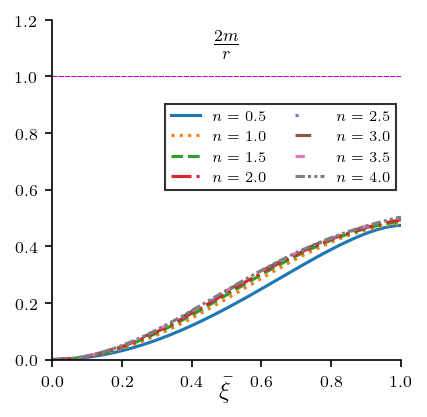

In [9]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][1],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))

ax1.set_xbound(0.0,1.0)
ax1.set_ybound(0.0,1.2)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\frac{2m}{r}$', x=0.5,y=0.85,fontsize=12)
ax1.legend(ncol=2, loc=(0.325,0.5),fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')

ax1.axhline(y=1.0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

plt.show()

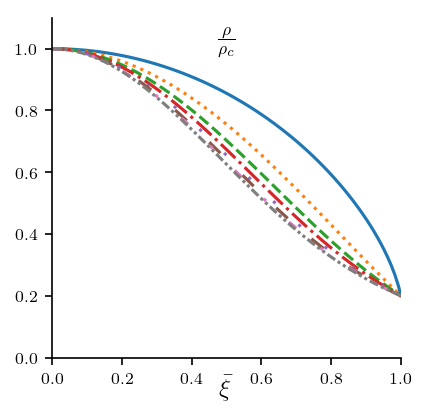

In [22]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][2],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))

ax1.set_xbound(0.0,1.0)
ax1.set_ybound(0.0,1.1)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\frac{\rho}{\rho_{c}}$', x=0.5,y=0.85,fontsize=12)
# ax1.legend(ncol=2, loc=(0.325,0.5),fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')

plt.show()

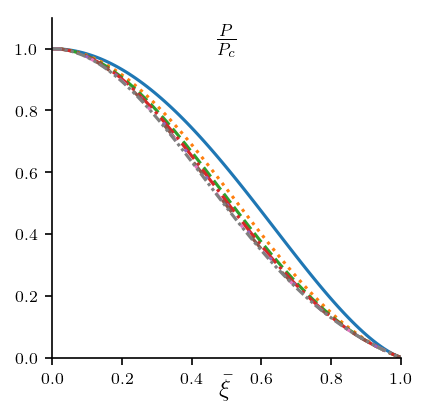

In [25]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][3],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))

ax1.set_xbound(0.0,1.0)
ax1.set_ybound(0.0,1.1)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\frac{P}{P_{c}}$', x=0.5,y=0.85,fontsize=12)
# ax1.legend(ncol=2, loc=(0.325,0.5),fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')

plt.show()

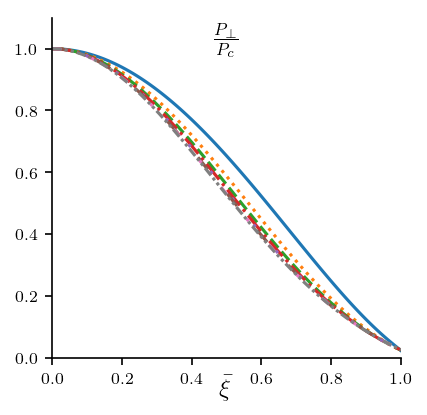

In [26]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][4],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))
    
ax1.set_xbound(0.0,1.0)
ax1.set_ybound(0.0,1.1)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\frac{P_{\perp}}{P_{c}}$', x=0.5,y=0.85,fontsize=12)
# ax1.legend(ncol=1, loc=3,fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')

plt.show()

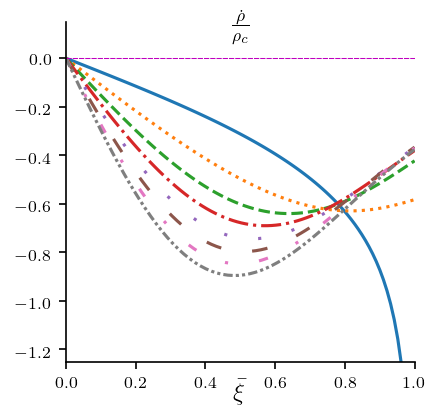

In [29]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][5],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))
    
ax1.set_xbound(0.0,1.0)
ax1.set_ybound(-1.25,0.15)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\frac{\dot{\rho}}{\rho_{c}}$', x=0.5,y=0.9,fontsize=12)
# ax1.legend(ncol=1, loc=3,fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')

ax1.axhline(y=0.0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

plt.show()

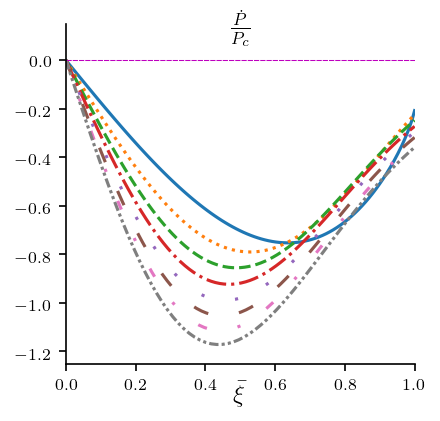

In [31]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][6],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))
    
ax1.set_xbound(0.0,1.0)
ax1.set_ybound(-1.25,0.15)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\frac{\dot{P}}{P_{c}}$', x=0.5,y=0.9,fontsize=12)
# ax1.legend(ncol=1, loc=3,fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')

ax1.axhline(y=0.0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

plt.show()

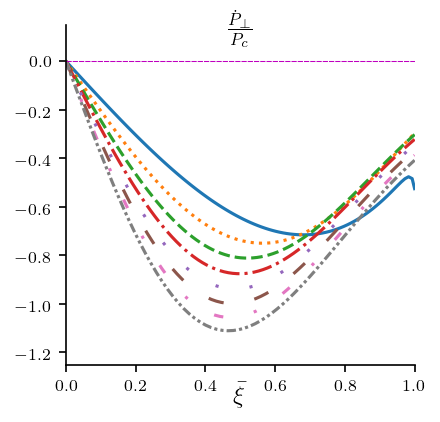

In [33]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][7],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))
    
ax1.set_xbound(0.0,1.0)
ax1.set_ybound(-1.25,0.15)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\frac{\dot{P}_{\perp}}{P_{c}}$', x=0.5,y=0.9,fontsize=12)
# ax1.legend(ncol=2, loc=4,fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

plt.show()

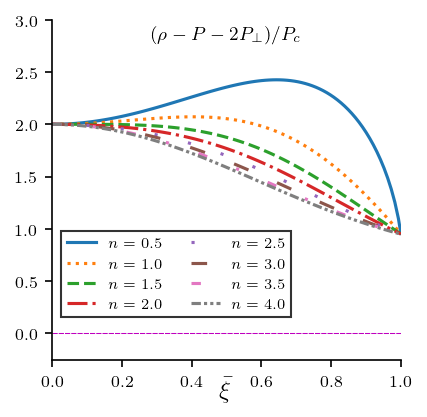

In [14]:
fig, ax1 = plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][8],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))

ax1.set_xbound(0.0,1.0)
ax1.set_ybound(-0.25,3.0)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$(\rho - P - 2P_{\perp})/P_{c}$', x=0.5,y=0.9,fontsize=9)
ax1.legend(ncol=2, loc=(0.025,0.125),fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

plt.show()

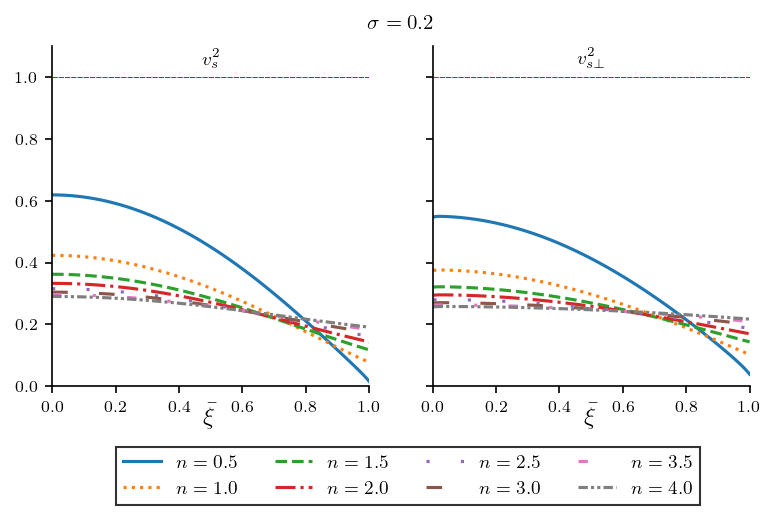

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(6,3),dpi=150)
fig.suptitle(r'$\sigma = {}$'.format(sigma),x=0.5125,y=0.95,fontsize=10)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][9],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))
    ax2.plot(ListaModelos[i][0],ListaModelos[i][10],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))

ax1.set_xbound(0.0,1.0)
ax1.set_ybound(0.0,1.1)
ax2.set_xbound(0.0,1.0)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax2.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax2.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$v^{2}_{s}$', x=0.5,y=0.9,fontsize=9)
ax2.set_title(r'$v^{2}_{s \perp}$', x=0.5,y=0.9,fontsize=9)
ax1.legend(ncol=4, loc=(0.2,-0.35),edgecolor='k',fancybox=False,fontsize=9)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')

ax1.axhline(y=1.0,color='m',linestyle=(0,(5,1)),linewidth=0.5)
ax2.axhline(y=1.0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

plt.show()

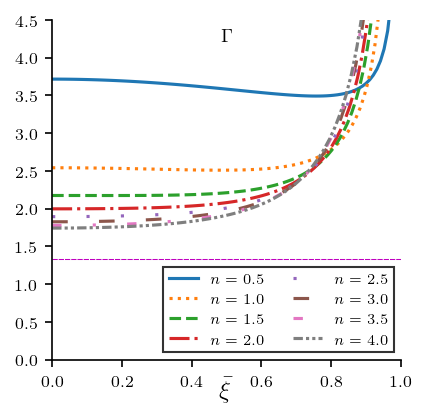

In [16]:
fig, ax1 = plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][11],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))

ax1.set_xbound(0.0,1.0)
ax1.set_ybound(0.0,4.5)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\Gamma$', x=0.5,y=0.9,fontsize=9)
ax1.legend(ncol=2, loc=4,fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.axhline(y=4/3,color='m',linestyle=(0,(5,1)),linewidth=0.5)

plt.show()

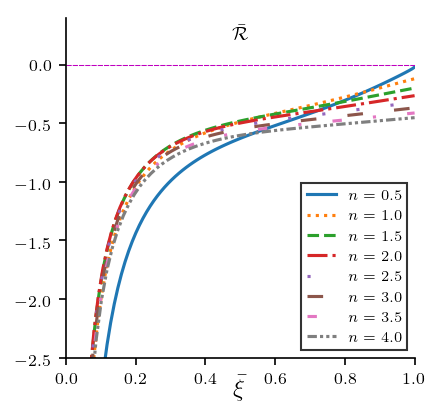

In [17]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][12],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))
    
ax1.set_xbound(0.0,1.0)
ax1.set_ybound(-2.5,0.4)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\bar{\mathcal{R}}$', x=0.5,y=0.9,fontsize=9)
ax1.legend(ncol=1, loc=4,fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)


plt.show()

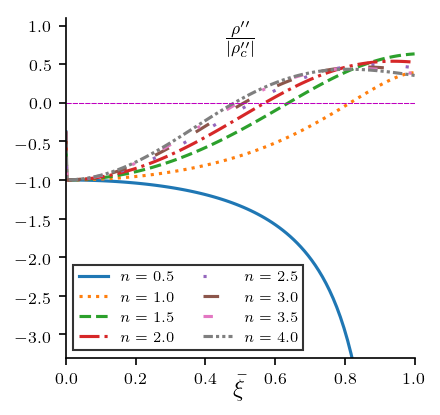

In [18]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][13]/abs(ListaModelos[i][13][1]),linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))
    
ax1.set_xbound(0.0,1.0)
ax1.set_ybound(-3.3,1.1)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\frac{\rho^{\prime \prime}}{|\rho^{\prime \prime}_{c}|}$', x=0.5,y=0.85,fontsize=12)
ax1.legend(ncol=2, loc=3,fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)


plt.show()

In [19]:
for i in range(len(Lista_n)):
    print("Radio", ListaModelos[i][14], "[km]", "    ", "M Grav.", ListaModelos[i][13], "[M_sun]")

IndexError: list index out of range

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(6,3),dpi=150)
fig.suptitle(r'$\sigma = {}$'.format(sigma),x=0.5125,y=0.95,fontsize=10)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][8],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))
    ax2.plot(ListaModelos[i][0],ListaModelos[i][11],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))

    
ax1.set_xbound(0.0,1.0)
ax1.set_ybound(-0.25,6.0)
ax2.set_xbound(0.0,1.0)
ax2.set_ybound(1.0,4.0)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax2.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax2.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$(\rho - P - 2P_{\perp})/P_{c}$', x=0.45,y=0.9,fontsize=9)
ax2.set_title(r'$\Gamma$', x=0.5,y=0.9,fontsize=9)
ax1.legend(ncol=4, loc=(0.2,-0.35),edgecolor='k',fancybox=False,fontsize=9)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax1.axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)
ax2.axhline(y=4/3,color='m',linestyle=(0,(5,1)),linewidth=0.5)

plt.show()